In [31]:
from imports import np, tf, plt, to_categorical, pd
import data_processing
import model_file

For an overview of the features and labels, the data is output as a DataFrame.

In [2]:
data = data_processing.preprocess_data()
print(data[0])

      precipitation  temp_max  temp_min  wind  weather
0               0.0      12.8       5.0   4.7  drizzle
1              10.9      10.6       2.8   4.5     rain
2               0.8      11.7       7.2   2.3     rain
3              20.3      12.2       5.6   4.7     rain
4               1.3       8.9       2.8   6.1     rain
...             ...       ...       ...   ...      ...
1456            8.6       4.4       1.7   2.9     rain
1457            1.5       5.0       1.7   1.3     rain
1458            0.0       7.2       0.6   2.6      fog
1459            0.0       5.6      -1.0   3.4      sun
1460            0.0       5.6      -2.1   3.5      sun

[1461 rows x 5 columns]


To get an overview of the data, the total counts of the weather conditions are displayed in a bar plot and pie chart.

Text(0.5, 0.98, 'Weather Distribution')

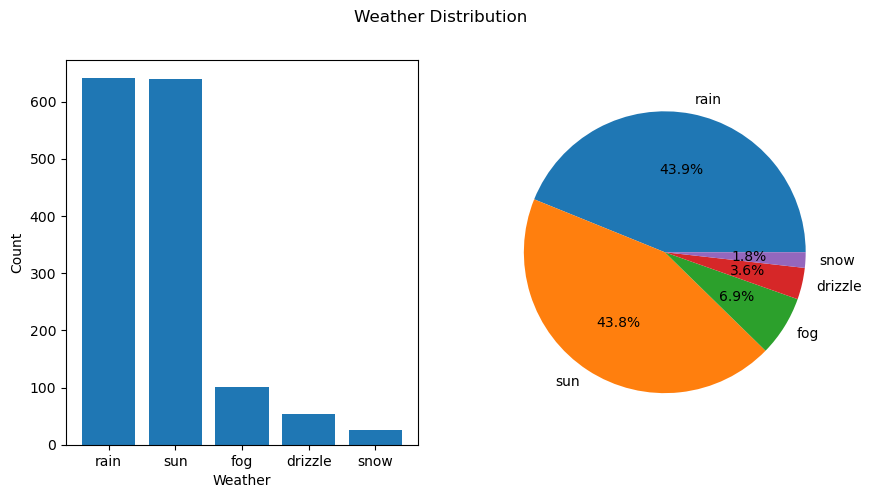

In [3]:
weather = data[0]["weather"]
counts = weather.value_counts()

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].bar(counts.index, counts)
ax[0].set_xlabel("Weather")
ax[0].set_ylabel("Count")
ax[1].pie(counts, labels=counts.index, autopct="%1.1f%%")
fig.suptitle("Weather Distribution")

Now the given data set is split into training and test data with the corresponding labels. A split ratio equal to 0.7 is used. After that the data is normalized in order to scale every feature to the same range of values. At the end, the labels are converted into numbers. In addition, the data is expanded by generating new data with noise. This should ensure a better performance on the validation data.

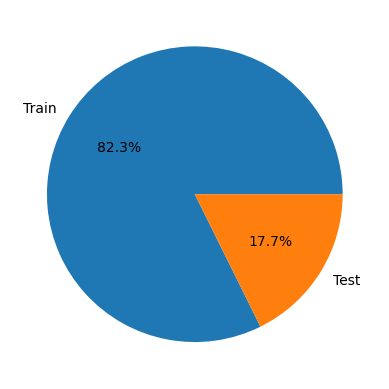

In [4]:
X_train, y_train, X_test, y_test = data_processing.split_data(data[1])
X_train, y_train = data_processing.create_more_data(X_train, y_train)
X_train, X_test = data_processing.normalize_data(X_train, X_test)
y_train, y_test, encoder = data_processing.encoder(y_train, y_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
plt.pie([len(X_train), len(X_test)], labels=["Train", "Test"], autopct="%1.1f%%")
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

Now it is time to train and test our model. I tried some runs before and 50 epochs are more than enough. A batch-size of 32 also works quite well.

In [5]:
input_shape = X_train[0].shape

model = model_file.build_model(input_shape)  
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

2024-03-14 22:53:30.509885: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-14 22:53:30.523988: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-14 22:53:30.524063: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-14 22:53:30.525969: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-14 22:53:30.526034: I external/local_xla/xla/stream_executor

Epoch 1/50


2024-03-14 22:53:36.823502: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-03-14 22:53:36.900274: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-14 22:53:37.827251: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f7ddc196600 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-14 22:53:37.827285: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070, Compute Capability 8.6
2024-03-14 22:53:37.831345: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1710453217.902835  313240 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


64/64 [==============================] - 11s 52ms/step - loss: 6.1953 - accuracy: 0.4344 - val_loss: 3.4285 - val_accuracy: 0.3850
Epoch 2/50
64/64 [==============================] - 1s 22ms/step - loss: 2.2569 - accuracy: 0.4374 - val_loss: 1.6814 - val_accuracy: 0.3850
Epoch 3/50
64/64 [==============================] - 1s 23ms/step - loss: 1.3862 - accuracy: 0.4574 - val_loss: 1.2753 - val_accuracy: 0.3850
Epoch 4/50
64/64 [==============================] - 1s 23ms/step - loss: 1.2085 - accuracy: 0.4457 - val_loss: 1.1864 - val_accuracy: 0.4875
Epoch 5/50
64/64 [==============================] - 1s 23ms/step - loss: 1.1409 - accuracy: 0.5215 - val_loss: 1.1101 - val_accuracy: 0.5877
Epoch 6/50
64/64 [==============================] - 1s 23ms/step - loss: 1.0533 - accuracy: 0.6355 - val_loss: 1.0252 - val_accuracy: 0.6811
Epoch 7/50
64/64 [==============================] - 1s 23ms/step - loss: 1.0021 - accuracy: 0.6737 - val_loss: 0.9967 - val_accuracy: 0.7130
Epoch 8/50
64/64 [=====

The plots show the performance of the network. By adjusting the model and some parameters the network works very well and also performs on the test data.

Text(0.5, 0.98, 'Model Performance')

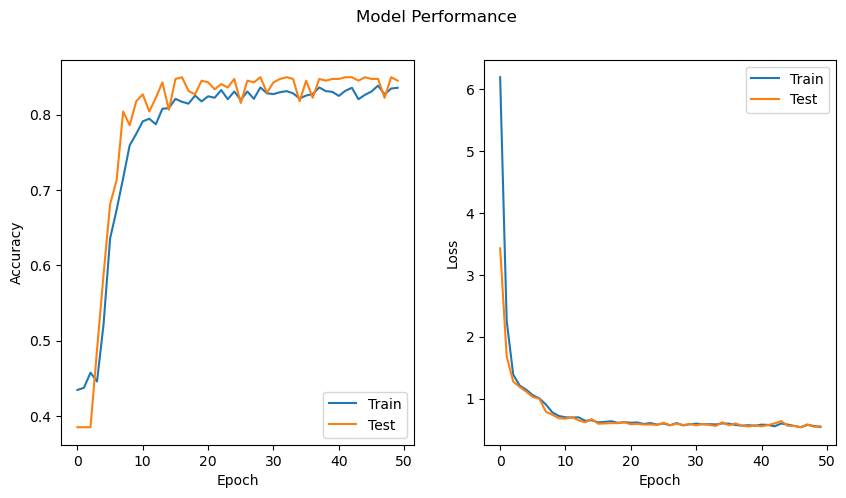

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(history.history["accuracy"], label="Train")
ax[0].plot(history.history["val_accuracy"], label="Test")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Accuracy")
ax[0].legend()
ax[1].plot(history.history["loss"], label="Train")
ax[1].plot(history.history["val_loss"], label="Test")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Loss")
ax[1].legend()
fig.suptitle("Model Performance")

Now we can also try to predict the weather on given data

In [32]:
predictions = model.predict(X_test[0:10])
predictions = np.argmax(predictions, axis=1)
predictions = encoder.inverse_transform(predictions)
real_values = y_test[0:10]
real_values = encoder.inverse_transform(real_values)

df = pd.DataFrame()
df["Real"] = real_values
df["Predicted"] = predictions
print(df)


1/1 [==============================] - 0s 23ms/step
      Real Predicted
0      fog       sun
1  drizzle       sun
2     rain      rain
3     rain      rain
4      sun       sun
5      sun       sun
6      sun       sun
7     rain      rain
8      sun       sun
9      sun       sun


As we can see the model predicted the first two events wrong. Every other event displayed here is predicted right!
In summary, the model does its job. At the beginning, the date was eliminated from the data. One could extract a season from the date as another feature. I could imagine that the performance could be improved because the season correlates with features like temperature and also the weather (more sunny days in summer logically).